In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" #fix for weird issue where matplotlib kills  kernel

from initializations import weight_init

In [2]:
def plot_init_weights(weight_ih, weight_oh, W):
    f,ax = plt.subplots(1,3,figsize=(15,3))
    ax[0].hist(weight_ih.flatten())
    ax[1].hist(weight_oh.flatten())
    ax[2].hist(W.flatten());

In [31]:
hidden_size = 5
input_size = 3
output_size = 3
g = 0.005

root_inv_hidden = 1 / np.sqrt(hidden_size)

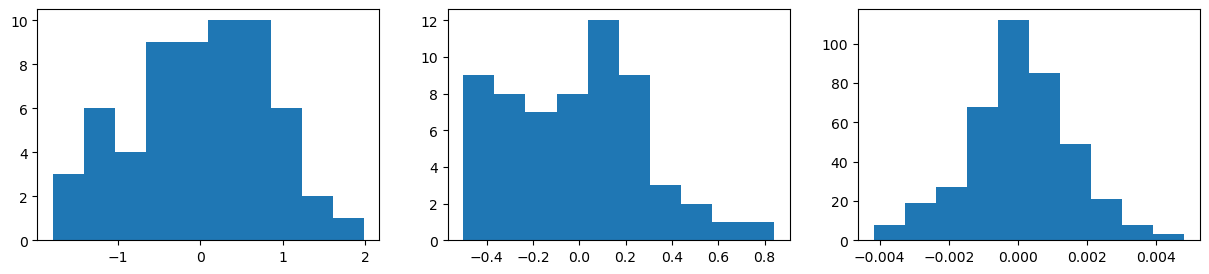

In [4]:
weight_ih, weight_oh, W = weight_init('He', hidden_size, input_size, output_size, g)
plot_init_weights(weight_ih, weight_oh, W)

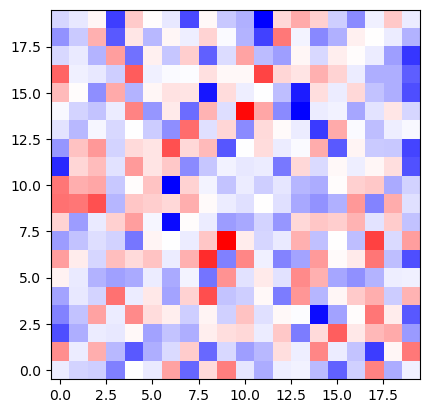

In [5]:
plt.imshow(W, origin='lower', cmap='bwr')
plt.show()

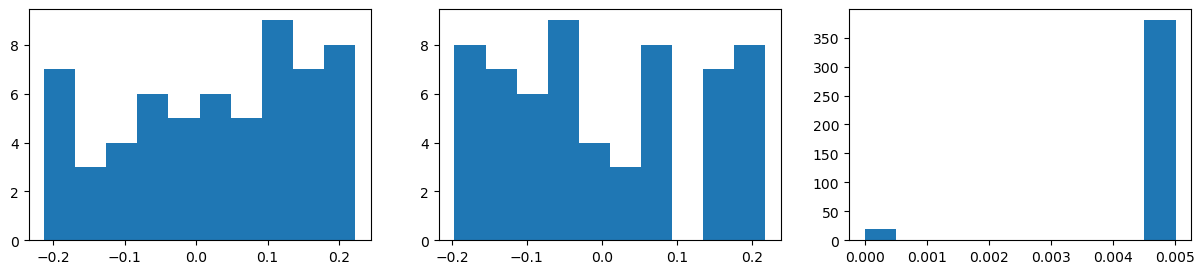

In [23]:
## uniform
weight_ih, weight_oh, W = weight_init('uniform', hidden_size, input_size, output_size, g)
plot_init_weights(weight_ih, weight_oh, W)

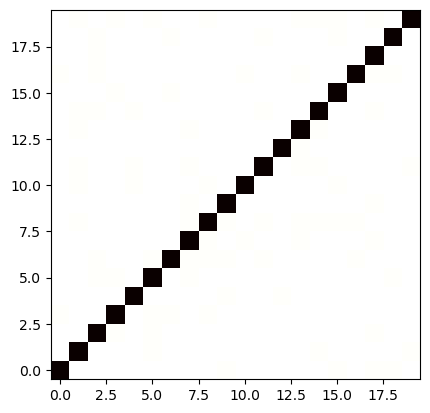

In [30]:
plt.imshow(W, origin='lower', cmap='hot')
plt.show()

In [32]:
root_inv_hidden = 1 / np.sqrt(hidden_size)
root_inv_hidden

0.4472135954999579

In [33]:
W = torch.FloatTensor(hidden_size, hidden_size).uniform_(-root_inv_hidden, root_inv_hidden)
W

tensor([[-0.3803, -0.0389,  0.1061,  0.1729, -0.2517],
        [-0.0412, -0.3693, -0.0565,  0.2882,  0.4005],
        [ 0.2966, -0.3742, -0.1856,  0.0807, -0.2689],
        [-0.1942,  0.1606, -0.1304,  0.4043,  0.2554],
        [-0.2765,  0.2495, -0.0561, -0.3228, -0.2179]])

In [34]:
W.log_normal_(0, g / np.sqrt(hidden_size))
W

tensor([[0.9981, 1.0010, 1.0007, 0.9969, 1.0012],
        [0.9966, 0.9992, 1.0051, 1.0008, 0.9990],
        [1.0015, 0.9995, 1.0023, 0.9986, 1.0020],
        [1.0014, 0.9941, 0.9997, 0.9980, 1.0005],
        [0.9992, 0.9981, 0.9992, 0.9993, 1.0000]])

In [35]:
W /= 10 * (torch.linalg.vector_norm(W, ord=2))
W

tensor([[0.0200, 0.0200, 0.0200, 0.0199, 0.0200],
        [0.0199, 0.0200, 0.0201, 0.0200, 0.0200],
        [0.0200, 0.0200, 0.0201, 0.0200, 0.0200],
        [0.0200, 0.0199, 0.0200, 0.0200, 0.0200],
        [0.0200, 0.0200, 0.0200, 0.0200, 0.0200]])

In [36]:
W.fill_diagonal_(0) #remove autapses
W

tensor([[0.0000, 0.0200, 0.0200, 0.0199, 0.0200],
        [0.0199, 0.0000, 0.0201, 0.0200, 0.0200],
        [0.0200, 0.0200, 0.0000, 0.0200, 0.0200],
        [0.0200, 0.0199, 0.0200, 0.0000, 0.0200],
        [0.0200, 0.0200, 0.0200, 0.0200, 0.0000]])